In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
dataset = pd.read_csv('IPhoneReview.csv', encoding='latin-1')

In [3]:
dataset.head()

,Unnamed: 0,Date,Review,UserName
0,0,16 Jan 2018,"mir, 16 Jan 2018My Huawei Mate 10 Pro is alrea...",Mr No
1,1,16 Jan 2018,This month it fell from 1149Â? to 999Â? in Ger...,Anonymous
2,2,16 Jan 2018,"chopp, 16 Jan 2018hey guys iam confused betwee...",Anonymous
3,3,16 Jan 2018,"chopp, 16 Jan 2018hey guys iam confused betwee...",Tony
4,4,16 Jan 2018,hey guys iam confused between buying iphone x ...,Anonymous


In [4]:
dataset.drop('Unnamed: 0', inplace= True, axis=1)

In [5]:
new_dataset1 = dataset.drop(['UserName', 'Date'], axis=1)

In [6]:
new_dataset1.head()

,Review
0,"mir, 16 Jan 2018My Huawei Mate 10 Pro is alrea..."
1,This month it fell from 1149Â? to 999Â? in Ger...
2,"chopp, 16 Jan 2018hey guys iam confused betwee..."
3,"chopp, 16 Jan 2018hey guys iam confused betwee..."
4,hey guys iam confused between buying iphone x ...


In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [8]:
import seaborn as sns

In [9]:
new_dataset1.shape

(2000, 1)

In [10]:
corpus = []
for i in range(new_dataset1.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', new_dataset1['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer() # remove er, ing, ed from words
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [11]:
from nltk import FreqDist


In [20]:
## it is used with tokenizer
most =FreqDist(str(corpus))

In [21]:
most.most_common(300)

[(' ', 55538),
 ('e', 29511),
 ('o', 21687),
 ('a', 21002),
 ('n', 18276),
 ('i', 18193),
 ('r', 16882),
 ('t', 16411),
 ('s', 15028),
 ('p', 14490),
 ('l', 14131),
 ('h', 9918),
 ('c', 9681),
 ('d', 8833),
 ('m', 8821),
 ('u', 8610),
 ('g', 6468),
 ('b', 4647),
 ('f', 4001),
 ("'", 4000),
 ('k', 3823),
 ('w', 3806),
 ('y', 3619),
 ('v', 3117),
 ('x', 2174),
 (',', 1999),
 ('z', 520),
 ('j', 471),
 ('q', 249),
 ('[', 1),
 (']', 1)]

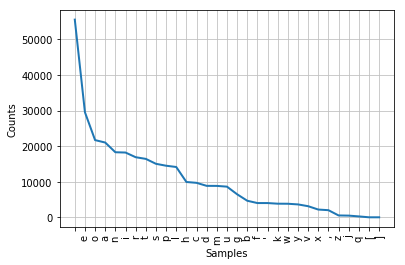

In [25]:

most.plot(250)

In [22]:
word_count = {}
for word in corpus:
    for w in word.split():
        if word_count.get(w) == None:
            word_count[w] = 1
        else:
            word_count[w] = word_count.get(w) + 1

In [12]:
new_dataset1['Clean'] = corpus

In [13]:
new_dataset1.head()

,Review,Clean
0,"mir, 16 Jan 2018My Huawei Mate 10 Pro is alrea...",mir jan huawei mate pro alreadi two week old f...
1,This month it fell from 1149Â? to 999Â? in Ger...,month fell germani via resel hope continu like
2,"chopp, 16 Jan 2018hey guys iam confused betwee...",chopp jan hey guy iam confus buy iphon x huawe...
3,"chopp, 16 Jan 2018hey guys iam confused betwee...",chopp jan hey guy iam confus buy iphon x huawe...
4,hey guys iam confused between buying iphone x ...,hey guy iam confus buy iphon x huawei pleas he...


In [14]:
count_dataset = pd.DataFrame()

In [15]:
count_dataset['Word'] = word_count.keys()

In [16]:
count_dataset['Count'] = word_count.values()

In [17]:
count_dataset.head()

,Word,Count
0,mir,2
1,jan,65
2,huawei,15
3,mate,25
4,pro,41


In [18]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [19]:
import warnings


In [20]:
warnings.filterwarnings('ignore')

In [21]:
#plt.figure(figsize=(15,10))
#count_dataset.plot.bar()

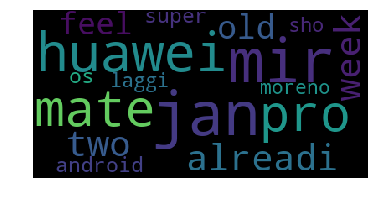

In [22]:
text = count_dataset['Word']
wordcloud = WordCloud().generate(corpus[0])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

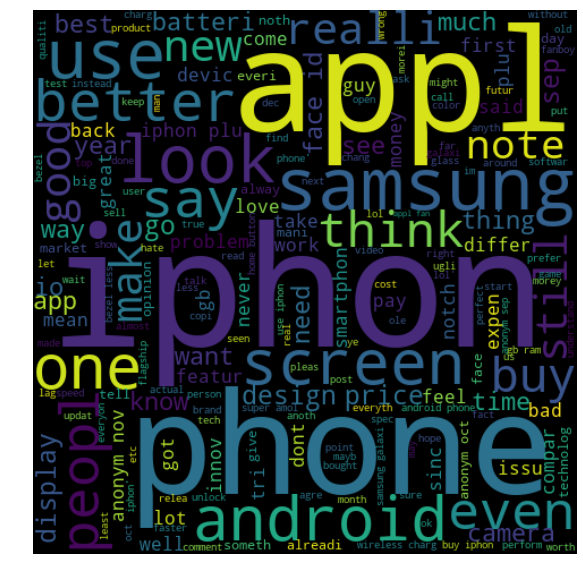

In [23]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Create a list of word
text = str(corpus)
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
plt.figure(figsize=(15,10)) 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


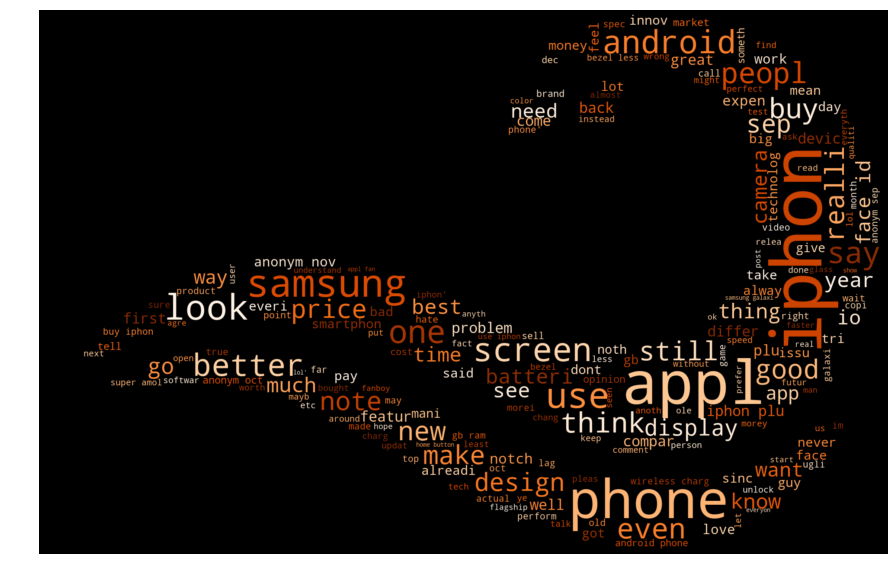

In [24]:
wave_mask = np.array(Image.open( "wave.png"))
 
# Make the figure
wordcloud = WordCloud(mask=wave_mask,background_color="black" ,colormap="Oranges_r").generate(text)
plt.figure(figsize=(16,10))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

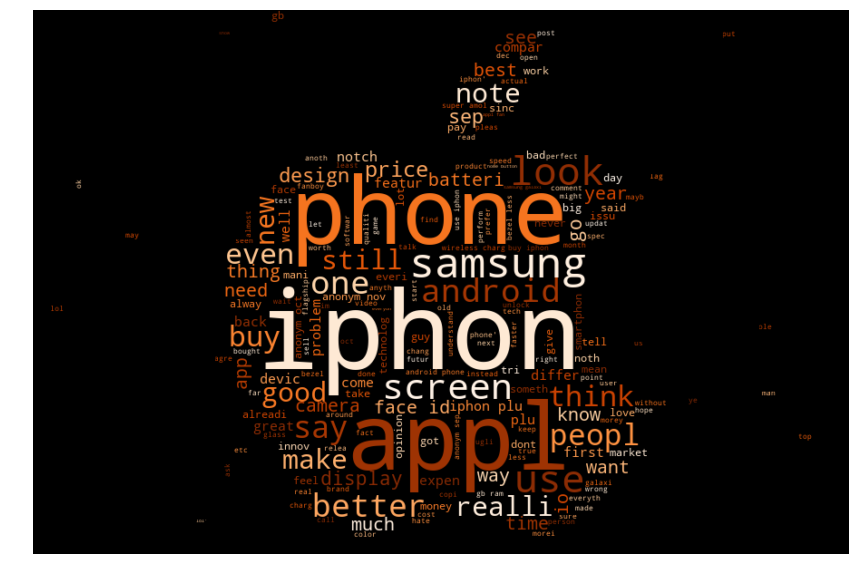

In [25]:
wave_mask = np.array(Image.open( "apple1.png"))
 
# Make the figure
wordcloud = WordCloud(mask=wave_mask,background_color="black" ,contour_width=3,colormap="Oranges_r").generate(text)
plt.figure(figsize=(16,10))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [29]:
from nltk.stem import WordNetLemmatizer
import nltk
#nltk.download('wordnet')
StopWords = set(stopwords.words('english'))
StopWords.update(['Android', 'samsung', 'android'])
corpus = []
for i in range(new_dataset1.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', new_dataset1['Review'][i])
    review = review.lower()
    review = review.split()
    wl = WordNetLemmatizer()
    #instead of returning the same words with the last 
    #charcteres removed it returns the root of the word or another word synonymous so the returns are true English words
    review = [wl.lemmatize(word) for word in review if not word in StopWords]
    review = ' '.join(review)
    corpus.append(review)

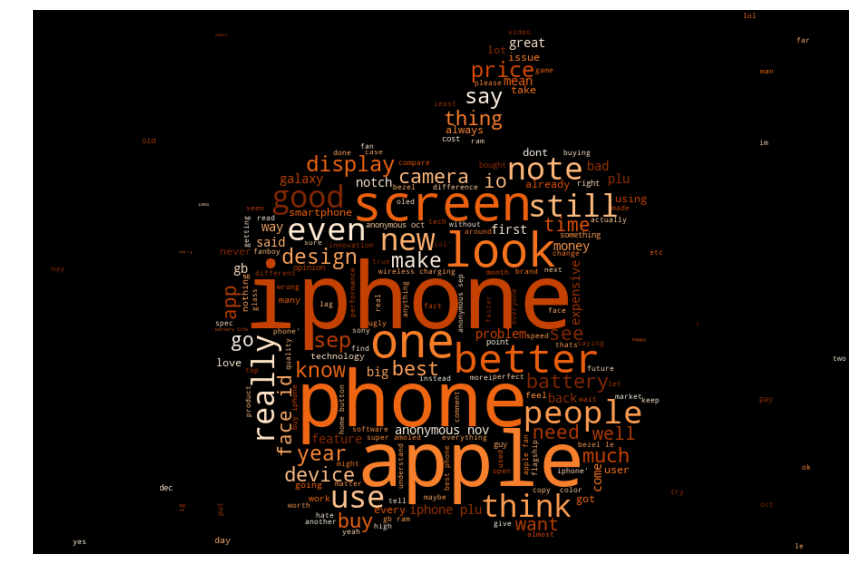

In [30]:
wave_mask = np.array(Image.open( "apple1.png"))
text = str(corpus)
# Make the figure
wordcloud = WordCloud(mask=wave_mask,background_color="black" ,contour_width=3,colormap="Oranges_r").generate(text)
plt.figure(figsize=(16,10))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

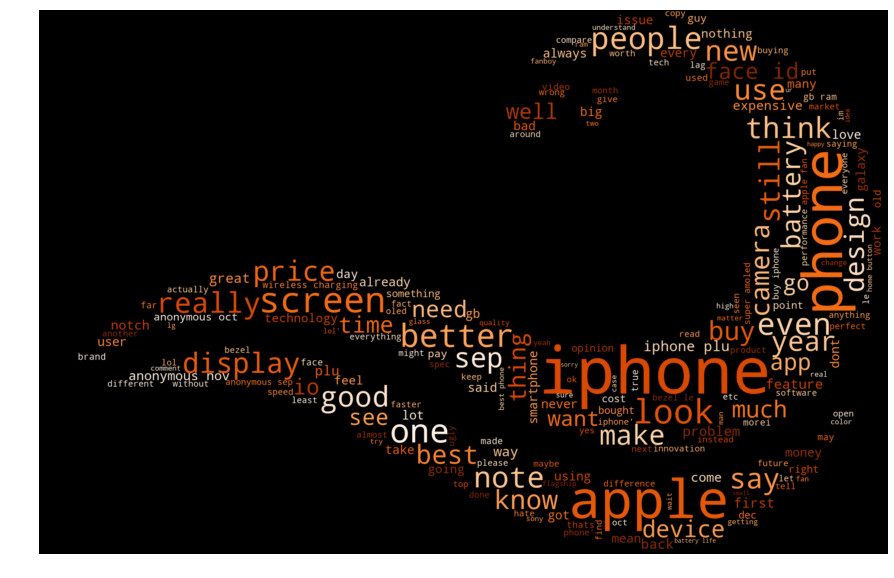

In [35]:
wave_mask = np.array(Image.open( "wave.png"))
 
# Make the figure
wordcloud = WordCloud(mask=wave_mask,background_color="black" ,colormap="Oranges_r").generate(text)
plt.figure(figsize=(16,10))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [36]:
from nltk.stem import WordNetLemmatizer
corpus = []
for i in range(new_dataset1.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', new_dataset1['Review'][i])
    review = review.lower()
    review = review.split()
    ps = WordNetLemmatizer() # remove er, ing, ed from words
    review = [ps.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [37]:
count_dataset = pd.DataFrame()
count_dataset['Word'] = word_count.keys()
count_dataset['Count'] = word_count.values()

In [38]:
count_dataset.head()

,Word,Count
0,mir,2
1,jan,65
2,huawei,15
3,mate,25
4,pro,41


In [28]:
#from nltk.classify import NaiveBayesClassifier

In [34]:
#new = new_dataset1.drop('Review', axis=1)

In [36]:
#from sklearn.model_selection import train_test_split

In [37]:
#X_train, X_test = train_test_split(new, test_size=0.33, random_state=42)